In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [39]:
'''
#  Attribute                     Domain
-- -----------------------------------------
1. Sample code number            id number
2. Clump Thickness               1 - 10
3. Uniformity of Cell Size       1 - 10
4. Uniformity of Cell Shape      1 - 10
5. Marginal Adhesion             1 - 10
6. Single Epithelial Cell Size   1 - 10
7. Bare Nuclei                   1 - 10
8. Bland Chromatin               1 - 10
9. Normal Nucleoli               1 - 10
10. Mitoses                       1 - 10
11. Class:                        (2 for benign, 4 for malignant)
'''
f = 'data/breast-cancer-wisconsin'
df = pd.read_csv(f+'.data', header=None)
df[10].unique()
df[10] = df[10].replace(2,0)
df[10] = df[10].replace(4,1)
#df = pd.to_numeric(df, errors='coerce')


In [40]:
def convertnumber(x):
    try:
        float(x)
        return True
    except:
        return False

df = df[df.applymap(convertnumber)]

df = df.dropna()
data = df.values

In [41]:
X = data[:,1:10].astype('float')
y = data[:,10].astype('int')

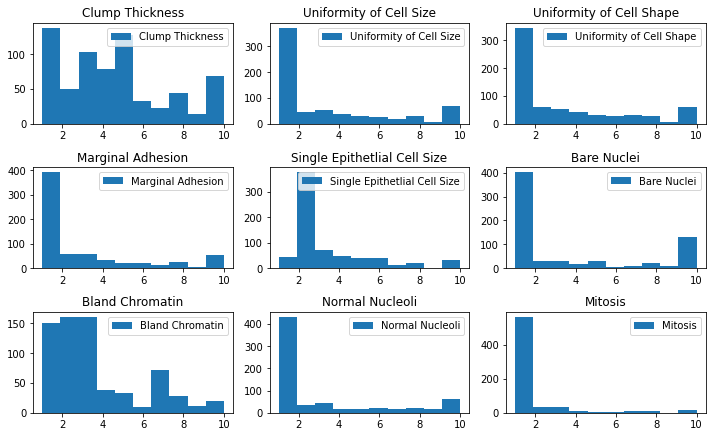

In [6]:
d = pd.DataFrame(X, columns = ['Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape',
                              'Marginal Adhesion', 'Single Epithetlial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                              'Normal Nucleoli', 'Mitosis'])

plt.figure(figsize=(10,20))
try:
    for i, col in enumerate(d.columns.to_list()):
        plt.subplot(10, 3, i + 1)
        plt.hist(d[col], label=col)
        plt.legend()
        plt.title(col)
        plt.tight_layout()
except Exception as e:
    print(col,e)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [9]:
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

In [11]:
models = [LogisticRegression(), KNeighborsClassifier(), SVC(), 
          GradientBoostingClassifier(), RandomForestClassifier(), GaussianNB(), AdaBoostClassifier()]

In [12]:
for model in models:
    #oneout = model_selection.LeaveOneOut()
    k = model_selection.KFold(n_splits=10, shuffle=True, random_state=100)
    results = model_selection.cross_val_score(model, X, y, cv=k)
    print('Model:', model, 'Accuracy:', round((results.mean()*100.0),2))
    #print(results)

Model: LogisticRegression() Accuracy: 96.78
Model: KNeighborsClassifier() Accuracy: 97.51
Model: SVC() Accuracy: 97.22
Model: GradientBoostingClassifier() Accuracy: 96.49
Model: RandomForestClassifier() Accuracy: 97.36
Model: GaussianNB() Accuracy: 96.19
Model: AdaBoostClassifier() Accuracy: 96.05


In [13]:
clf = RandomForestClassifier()
clf.fit(X,y)
fim = clf.feature_importances_

In [14]:
feature_idx = [*range(0, 9, 1)]
feature_idx = [str(x) for x in feature_idx]

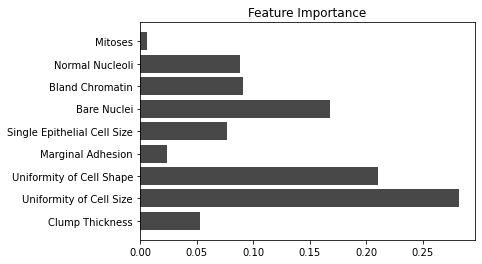

In [37]:
feature_idx = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
            'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei',
            'Bland Chromatin', 'Normal Nucleoli', 'Mitoses']
plt.barh(feature_idx, fim, color='#484848')
plt.title('Feature Importance')
plt.show()

In [ ]:
# That's all, folks!